In [1]:
import glob
from netCDF4 import Dataset
from dateutil.parser import parse
import datetime
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pytz
from datetime import datetime as dt

In [2]:
the_file='cabauw_ubc1.nc' # *** CHANGED FILE NAME FOR MY OWN DATASET
group='m201408'
with Dataset(the_file,'r') as nc_ubc:
    aug_nc=nc_ubc.groups[group]
    z=nc_ubc.variables['z'][...]
    aug_speed=aug_nc.variables['F'][...]
    aug_ta002 = aug_nc.variables['TA002']


In [3]:
hourly_wind_avg=aug_speed.mean(axis=2)

In [4]:
hourly_wind_avg.shape

(31, 24, 7)

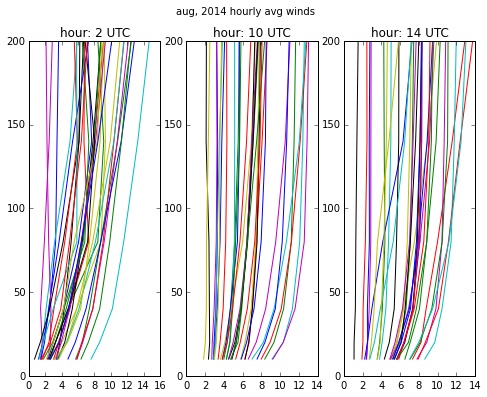

In [5]:
%matplotlib inline
the_month='aug, 2014'
hour=2
fig,ax=plt.subplots(1,3,figsize=(8,6))
ax[0].plot(hourly_wind_avg[:,hour,:].T,z)
ax[0].set(title='hour: {} UTC'.format(hour))
hour=10
ax[1].plot(hourly_wind_avg[:,hour,:].T,z)
ax[1].set(title='hour: {} UTC'.format(hour))
fig.suptitle('{} hourly avg winds'.format(the_month))
hour=14
ax[2].plot(hourly_wind_avg[:,hour,:].T,z)
ax[2].set(title='hour: {} UTC'.format(hour))
fig.suptitle('{} hourly avg winds'.format(the_month))

```
S=a0 + a1*z + a2*z**2 + a3*np.log(z)
direc=b0 + b1*z + b2*z**2
theta=c0 + c1*z + c2*z**2. + c3*np.log(z)
```

(6,)


array([  1.91304687e+00,   3.56421223e-02,  -5.27527483e-05,
         4.53991045e-01])

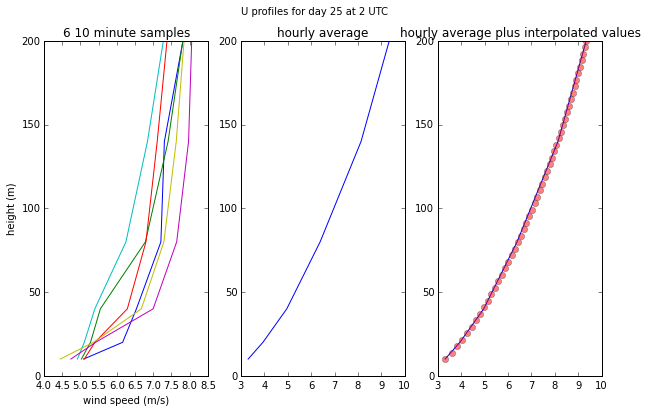

In [6]:

#http://kitchingroup.cheme.cmu.edu/blog/2013/02/12/Nonlinear-curve-fitting-with-parameter-confidence-intervals/
import numpy as np
from scipy.optimize import curve_fit
import scipy
from scipy.stats.distributions import  t
import warnings
warnings.filterwarnings("ignore",category=scipy.optimize.OptimizeWarning)

# 2 UTC
hour1=2 # early morning
day=25
fig,ax=plt.subplots(1,3,figsize=(10,6))
sample1=aug_speed[day,hour,:,:]
fig.suptitle('U profiles for day {} at {} UTC'.format(day,hour1))
ax[0].plot(sample1.T,z)
ax[0].set(title='6 10 minute samples',xlabel='wind speed (m/s)',
         ylabel='height (m)')
ax[1].plot(hourly_wind_avg[day,hour1,:],z)
ax[1].set(title='hourly average')
ax[2].plot(hourly_wind_avg[day,hour1,:],z)
ax[2].set(title='hourly average plus interpolated values')
#
# flip tower data so it goes from bottom to top
# and get rid of the lowest level, which doesn't
# have a measurement
#
rev_z=z[::-1]
rev_z=rev_z[1:]
print(rev_z.shape)
test=hourly_wind_avg[day,hour1,::-1]
test=test[1:]

def wind_func(z, *coeffs):
    'nonlinear function in a and to fit to data'
    fit = coeffs[0] + coeffs[1]*z + coeffs[2]*z**2. + coeffs[3]*np.log(z)
    return fit

initial_guess=[0,0,0,0]
pars, pcov = curve_fit(wind_func, rev_z, test, p0=initial_guess)
initial_guess
pars
zinterp=np.linspace(10.,200,50.)
speed_interp=wind_func(zinterp,*pars)
ax[2].plot(speed_interp,zinterp,'ro',alpha=0.5)
pars

(6,)


array([  2.46395968e+00,   2.20417145e-03,   3.05294225e-06,
         8.52843230e-01])

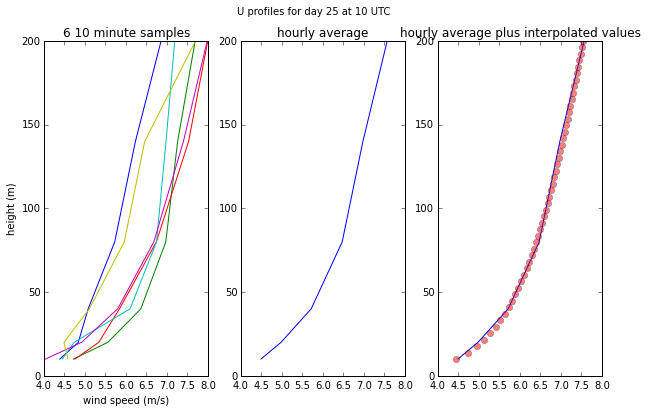

In [7]:
# 10 UTC
hour2=10 # later morning
day=25
fig,ax=plt.subplots(1,3,figsize=(10,6))
fig.suptitle('U profiles for day {} at {} UTC'.format(day,hour2))
sample2=aug_speed[day,hour2,:,:]
ax[0].plot(sample2.T,z)
ax[0].set(title='6 10 minute samples',xlabel='wind speed (m/s)',
         ylabel='height (m)')
ax[1].plot(hourly_wind_avg[day,hour2,:],z)
ax[1].set(title='hourly average')
ax[2].plot(hourly_wind_avg[day,hour2,:],z)
ax[2].set(title='hourly average plus interpolated values')
#
# flip tower data so it goes from bottom to top
# and get rid of the lowest level, which doesn't
# have a measurement
#
rev_z=z[::-1]
rev_z=rev_z[1:]
print(rev_z.shape)
test=hourly_wind_avg[day,hour2,::-1]
test=test[1:]

initial_guess=[0,0,0,0]
pars, pcov = curve_fit(wind_func, rev_z, test, p0=initial_guess)
initial_guess
pars
zinterp=np.linspace(10.,200,50.)
speed_interp=wind_func(zinterp,*pars)
ax[2].plot(speed_interp,zinterp,'ro',alpha=0.5)
pars

(6,)


array([  2.62973066e+00,   2.41342816e-03,  -1.23792452e-05,
         9.54654144e-01])

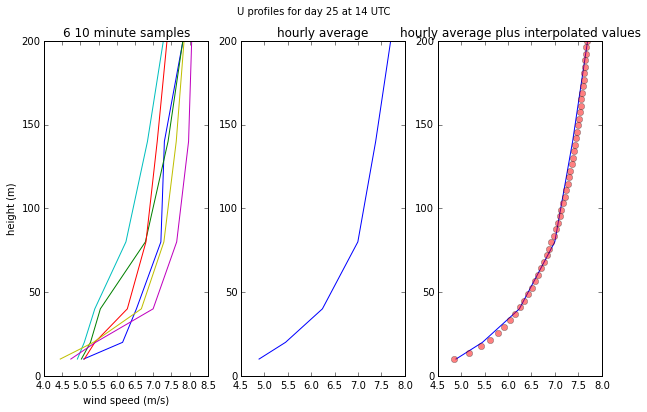

In [8]:
# 14 UTC
hour3=14 # afternoon
day=25
fig,ax=plt.subplots(1,3,figsize=(10,6))
fig.suptitle('U profiles for day {} at {} UTC'.format(day,hour3))
sample3=aug_speed[day,hour3,:,:]
ax[0].plot(sample3.T,z)
ax[0].set(title='6 10 minute samples',xlabel='wind speed (m/s)',
         ylabel='height (m)')
ax[1].plot(hourly_wind_avg[day,hour3,:],z)
ax[1].set(title='hourly average')
ax[2].plot(hourly_wind_avg[day,hour3,:],z)
ax[2].set(title='hourly average plus interpolated values')
#
# flip tower data so it goes from bottom to top
# and get rid of the lowest level, which doesn't
# have a measurement
#
rev_z=z[::-1]
rev_z=rev_z[1:]
print(rev_z.shape)
test=hourly_wind_avg[day,hour3,::-1]
test=test[1:]

initial_guess=[0,0,0,0]
pars, pcov = curve_fit(wind_func, rev_z, test, p0=initial_guess)
initial_guess
pars
zinterp=np.linspace(10.,200,50.)
speed_interp=wind_func(zinterp,*pars)
ax[2].plot(speed_interp,zinterp,'ro',alpha=0.5)
pars

In [9]:
with Dataset(the_file,'r') as nc_ubc:
    aug_nc=nc_ubc.groups[group]
    H=aug_nc.variables['H'][...]
    LE = aug_nc.variables['LE'][...]
    USTAR = aug_nc.variables['UST'][...]
    TA002 = aug_nc.variables['TA002'][...]
    Q002 = aug_nc.variables['Q002'][...]
    P0 = aug_nc.variables['P0'][...]
    timevec = aug_nc.variables['time'][...]
    timevec = [dt.fromtimestamp(item,pytz.utc) \
               for item in timevec.flat]
    
Rd=287.  #J/kg/K
cp = 1004.  #J/kg/K
k = 0.4
g=9.8
rho = P0*1.e2/(Rd*(TA002 + 273.15))

In [10]:
#fleagle and bussinger eq. 6.31
Eb = H + 0.02*LE
#virtural temperature 
Tv = TA002 + 273.15  + 0.61*Q002*1.e-3
#Fleagle and Businger 6.47
L = - Tv*cp*rho*USTAR**3./(k*g*Eb)
good = np.abs(Eb) > 1

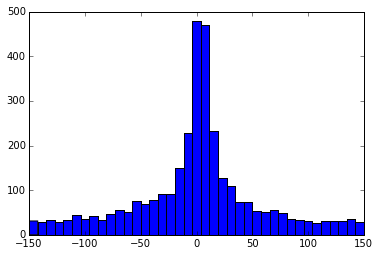

In [11]:
fig,ax=plt.subplots(1,1)
out=plt.hist(L[good].flat,bins=np.linspace(-150,150,40))

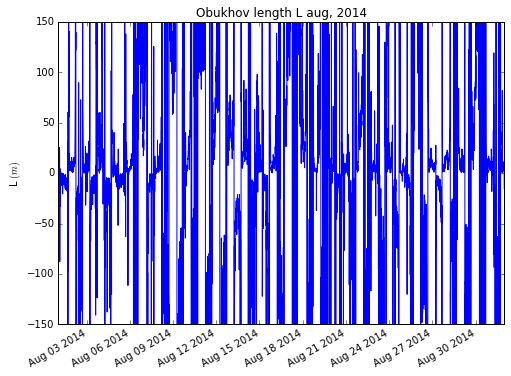

In [12]:
fig,ax=plt.subplots(1,1,figsize=(8,6))
fig.autofmt_xdate()
ax.plot(timevec,L.flat)
title='Obukhov length L {}'.format(the_month)
out=ax.set(title=title,ylabel='L $(m)$',ylim=[-150,150])

In [13]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


[0.015469204, -0.25846666, -0.12956296]
[2.0309621098942676, 1.3319811528349379, 1.3306330313923722]


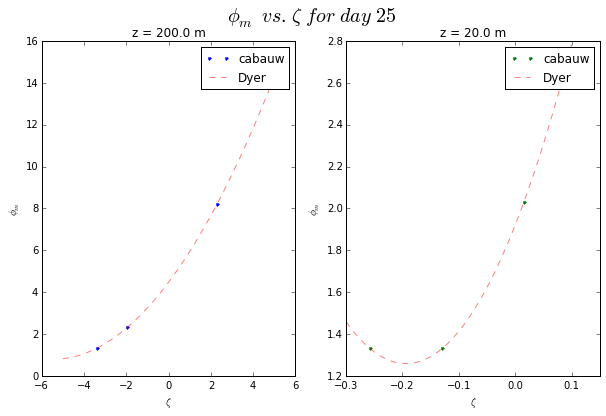

In [14]:
# get indexes for z = 20 m and z = 200 m
level_200 = np.where(z == 200)[0][0]
level_20 = np.where(z == 20)[0][0]

def find_gradient(hourly_wind_avg, z, day, hour, level):
    "Function to quickly calculate dUdz for a certain hour and level"
    "Uses 'forward euler' to numerically calculate gradient"
    
    return (hourly_wind_avg[day,hour,level] - hourly_wind_avg[day,hour,level+1])/(z[level] - z[level+1])

def find_scaling(hourly_wind_avg, z, L, ustars, day, hour, level):
    """Calculate phi and zeta at a given level and time"""
    
    k = 0.40
    height = z[level]
    ustar = ustars[day, hour, level]
    dUdz = find_gradient(hourly_wind_avg, z, day, hour, level)
    phi = (k*height/ustar)*dUdz
    zeta = z[level]/L[day, hour, level]
    return phi,zeta


def scale_func(zeta, *coeffs):
    'nonlinear function to fit dUdz to data'
    gradient_fit = (zeta**(1))*(coeffs[0] + 2*coeffs[1]*zeta + coeffs[2]*1/zeta) # derivative, dU/dz as estimated from Nieuwstadt (1984)
    return gradient_fit
    
hours = [hour1,hour2,hour3]
levels = [level_200, level_20]

phi_len = len(hours)*len(levels)
phis = np.empty([phi_len])
zetas = np.empty([phi_len])

phis200 = []
zetas200 = []
phis20 = []
zetas20 = []

for hour in hours:
    for level in levels:
        phi,zeta = find_scaling(hourly_wind_avg, z, L, USTAR, day, hour, level)
        if level==levels[0]:
            phis200.append(phi)
            zetas200.append(zeta)
        else:
            phis20.append(phi)
            zetas20.append(zeta)

fig,ax=plt.subplots(1,2,figsize=(10,6))
fig.suptitle(r"$\phi_m\ vs.\ \zeta\ for\ day\ {}$".format(day,hour3),fontsize=20)
ax[0].plot(zetas200, phis200, '.b',label='cabauw')
ax[1].plot(zetas20, phis20, '.g',label='cabauw')
ax[0].set(xlabel=r'$\zeta$',ylabel=r'$\phi_m$',title='z = {} m'.format(z[levels[0]]))
ax[1].set(xlabel=r'$\zeta$',ylabel=r'$\phi_m$',title='z = {} m'.format(z[levels[1]]))

# fit curve for z = 200 m
initial_guess=[0,0,0]
pars200, pcov200 = curve_fit(scale_func, zetas200, phis200, p0=initial_guess)
zinterp=np.linspace(-5,5,50.)
grad_interp=scale_func(zinterp,*pars200)
dyer200=ax[0].plot(zinterp,grad_interp,'r--',alpha=0.5,label='Dyer')
# fit curve for z = 20 m
initial_guess=[0,0,0]
print(zetas20)
print(phis20)
pars20, pcov20 = curve_fit(scale_func, zetas20, phis20, p0=initial_guess)
zinterp=np.linspace(-0.3,0.1,50.)
grad_interp=scale_func(zinterp,*pars20)
dyer20=ax[1].plot(zinterp,grad_interp,'r--',alpha=0.5,label='Dyer')
ax[0].legend()
ax[1].legend()